Loaded miles_dat.txt containing 128 cities.
digraph has 128 nodes with 8128 edges
Edges considered (in ascending order) for this graph =  1307

Number of edges selected by Kruskal's =  127


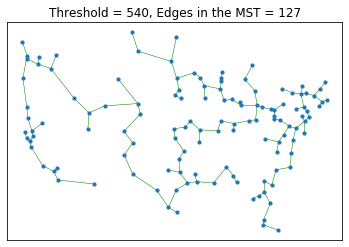

In [79]:
# Author: Aric Hagberg (hagberg@lanl.gov)

#    Copyright (C) 2004-2019 by
#    Aric Hagberg <hagberg@lanl.gov>
#    Dan Schult <dschult@colgate.edu>
#    Pieter Swart <swart@lanl.gov>
#    All rights reserved.
#    BSD license.

#    Modified by Shivendra Agrawal
import random
import re
import matplotlib.pyplot as plt
import networkx as nx

## DO NOT MODIFY THE CODE WITHIN THIS BLOCK ########################################

def miles_graph():
    """ Return the cites example graph in miles_dat.txt
        from the Stanford GraphBase.
    """
    # open file miles_dat.txt.gz (or miles_dat.txt)
    import gzip
    fh = gzip.open('miles_dat.txt.gz', 'r')

    G = nx.Graph()
    G.position = {}
    G.population = {}

    cities = []
    for line in fh.readlines():
        line = line.decode()
        if line.startswith("*"):  # skip comments
            continue

        numfind = re.compile("^\d+")

        if numfind.match(line):  # this line is distances
            dist = line.split()
            for d in dist:
                G.add_edge(city, cities[i], weight=int(d))
                i = i + 1
        else:  # this line is a city, position, population
            i = 1
            (city, coordpop) = line.split("[")
            cities.insert(0, city)
            (coord, pop) = coordpop.split("]")
            (y, x) = coord.split(",")

            G.add_node(city)
            # assign position - flip x axis for matplotlib, shift origin
            G.position[city] = (-int(x) + 7500, int(y) - 3000)
            G.population[city] = float(pop) / 1000.0
    return G


def draw_graph(G, kruskal_selected_edges, sorted_edges):
    '''
    Plots the networkx graph with MST selected by Kruskal's as overlay

    :param G: Networkx graph
    :param kruskal_selected_edges: List of edge tuple
    :return: None
    '''
    pos = G.position  # positions for all nodes
    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=10)
    title = ""

    if len(kruskal_selected_edges) > 0:
        non_MST_edges = [edge for edge in sorted_edges if edge not in kruskal_selected_edges]
        nx.draw_networkx_edges(G, pos,
                               edgelist=kruskal_selected_edges, width=0.5, edge_color='g')
        print("\nNumber of edges selected by Kruskal's = ", len(kruskal_selected_edges))

        nx.draw_networkx_edges(G, pos, edgelist=non_MST_edges,
                                width=1, alpha=0.5, edge_color='b')
        title = ", Edges in the MST = " + str(len(kruskal_selected_edges))
    else:
        nx.draw_networkx_edges(G, pos, edgelist=sorted_edges,
                               width=1, alpha=0.5, edge_color='b')
    plt.title("Threshold = " + str(EDGE_SELECTION_CRITERIA) + title)
    plt.savefig('MST.png')
    plt.show()


def find(vertex):
    '''
    Function that returns the leader vertex for any 'vertex'
    '''
    return leader_dict[vertex]

####################################################################################

def union(x, y, leader, components):
    #TODO
    rootX = find(x)
    rootY = find(y)
    #if the length of rootX's tree is greater than or equal to rootY's
    if(len(components[rootX]) > len(components[rootY])-1):
        leader_dict[rootY] = rootX
        components[rootX].append(rootY)
        for i in components[rootY]:
            leader_dict[i] = rootX
            components[rootX].append(i)
    #if length of rootY's tree is greater than or equal to rootX's
    else:        
        leader_dict[rootX] = rootY
        components[rootY].append(rootX)
        for i in components[rootX]:
            leader_dict[i] = rootY
            components[rootY].append(i)
            

if __name__ == '__main__':
    ########## DO NOT MODIFY THE CODE IN THIS BLOCK ################################

    EDGE_SELECTION_CRITERIA = random.choice([500 + (i+1)*20 for i in range(4)])

    G = miles_graph()

    print("Loaded miles_dat.txt containing 128 cities.")
    print("digraph has %d nodes with %d edges"
          % (nx.number_of_nodes(G), nx.number_of_edges(G)))


    edges_to_consider = [(u, v, d) for (u, v, d) in G.edges(data=True)
                         if d['weight'] <= EDGE_SELECTION_CRITERIA]
    sorted_edges = [(u, v) for (u, v, d) in sorted(edges_to_consider,
                                                   key=lambda x:x[2]['weight'])]
    vertices = []
    for u, v in sorted_edges:
        vertices.append(u)
        vertices.append(v)
    vertices = list(set(vertices))

    print("Edges considered (in ascending order) for this graph = ", len(sorted_edges))

    # A dictionary that has key as edge (u, v) and value as the length of the edge
    length_of_edge = {(u, v):d for (u, v, d) in edges_to_consider}

    # 'Find' function can be easily emulated via dict and
    # initially all vertices form their own component and point to just themselves
    # 'leader_dict' has key as vertex and value as it's leader vertex
    leader_dict = {v : v for v in vertices}

    # 'components' have key as the leader vertex and
    # value as a list of vertices that are in that component
    # Initially all the vertices form their own components
    components = {find(v) : [v] for v in vertices}

    kruskal_selected_edges = []
    ################################################################################

    # Write your code below to populate the 'kruskal_selected_edges' list
    # with the edges in the MST using the Kruskal's algorithm
    
    # Note that after the union call, you need to merge the components and
    # update the relevant leaders in 'leader_dict' otherwise find() won't work as expected

    # Your solution can start after this comment. You should also finish the 'union()' function
    # and use it along with the find() to write Kruskal's algorithm to populate
    # 'kruskal_selected_edges' list
    # You are allowed to change the signature of the union function
    counter = 0
    #the 'k' used to stop Kruskal's algorithm early
    k = 0
    while len(sorted_edges) > 0:
        minimum = sorted_edges[0]

        #Check to see if vertices create a cycle.
        if leader_dict[minimum[0]] != leader_dict[minimum[1]]:
            #After 127 iterations where this if statement is true,
            #no more edges are added because sorted_edges needs to be empty
            if counter == (127 - k):
                print("length of minimum distance between two clusters: ",length_of_edge[minimum])
            union(minimum[0], minimum[1], leader_dict, components)
            kruskal_selected_edges.append(minimum)
            counter = counter + 1

        #Remove from sorted edges
        del sorted_edges[0]
    # Do not remove this line, it will save the MST as a figure for you
    draw_graph(G, kruskal_selected_edges, sorted_edges)